# Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
water = pd.read_csv('water.csv')

In [3]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные. #смертность и твердость

# Задание 1
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?


Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

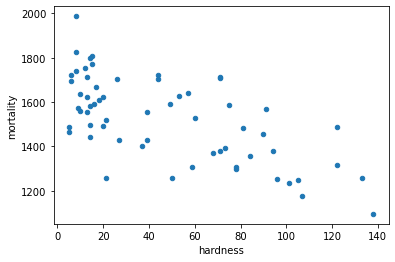

In [5]:
# Построить точечный график

water.plot(kind='scatter' , x = 'hardness' , y = 'mortality')

In [6]:
# Коэффициенты корреляции Спирмена

water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
# Коэффициенты корреляции Пирсона

water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


<AxesSubplot:>

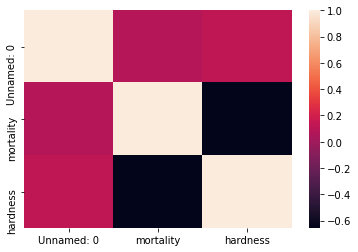

In [8]:
sns.heatmap(water.corr())

In [9]:
# Построить модель линейной регрессии

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# данные в переменные

X = water[['hardness']]
y = water['mortality']

In [11]:
# делим данные 70% на 30% чтобы провести обучение

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
# метод обучается на данных и подбирает оптимальные коэффициенты

model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [13]:
# Коэф. подобранный для Х

model.coef_

array([-3.13167087])

In [14]:
# Коэф. подобранный для b (Независимый член в линейной модели)

model.intercept_

1668.9722977277095

In [15]:
# Уравнение прямой ах+b => 
#  y = -3.13167087 * x + 1668.97

In [16]:
# Получаем совокупность прогнозов

y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [17]:
# сравниваем прогнозы с фактом

res_water = X_test.copy()

res_water['y_pred'] = y_pred
res_water['y_test'] = y_test
res_water

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


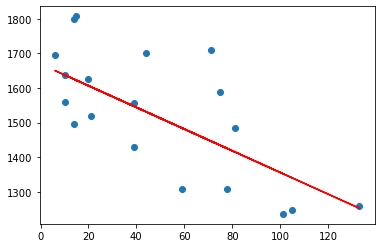

In [18]:
#Визуализируем, где красная линия - линия Регрессии  (модель линейной регрессии)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [19]:
# метод возвращает значение коэффициента детерминации

model.score(X_test, y_test) 

# Чем ближе к 1, тем лучше регрессия показывает зависимость данных

0.5046490611017092

In [20]:
import statsmodels.api as sm

In [21]:
X_const = sm.add_constant(X_train)
# техническая особенность библиотек, надо руками добавить константу

In [22]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           7.83e-06
Time:                        05:16:53   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

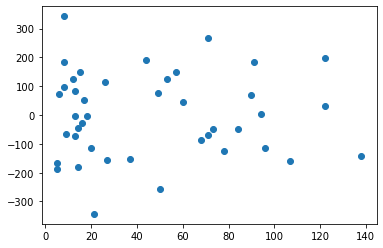

In [23]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <BarContainer object of 10 artists>)

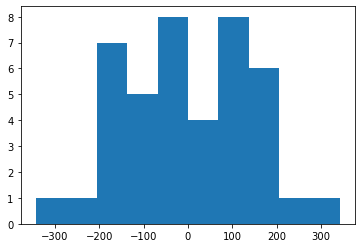

In [24]:
plt.hist(results.resid)

# Задание 2
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?



Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [25]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [26]:
# Делим данные на регионы

water_south = water[water.location == 'South']
water_north = water[water.location == 'North']

In [27]:
water_south.shape

(26, 5)

In [28]:
water_north.shape

(35, 5)

# Расчитаем Южный регион 

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

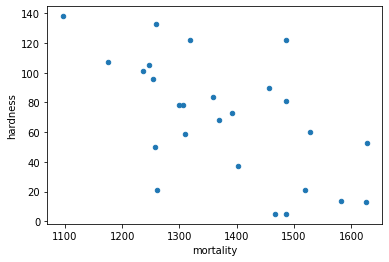

In [29]:
# Точечный для Юга

water_south.plot(kind='scatter', x='mortality', y='hardness')

In [30]:
# Кор. Пирсона для Юга (south)

water_south[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [31]:
# Кор. Спирмена для Юга

water_south[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


# Регрессия Южного региона

In [32]:
X_south = water_south[['hardness']]
y_south = water_south['mortality']

In [33]:
# Поскольку данных стало меньше, тестируемые данные (контрольную выборку) приведем к 10% иначе коэф детерминации становится отрицательным

X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X_south, y_south, test_size=0.10, random_state=42)

In [34]:
model_south = LinearRegression()
model_south.fit(X_train_south, y_train_south)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [35]:
model_south.coef_

array([-2.1645425])

In [36]:
model_south.intercept_

1529.143749365289

In [37]:
y_pred_south = model_south.predict(X_test_south)
y_pred_south

array([1265.06956433, 1518.32103686, 1301.86678684])

In [38]:
model_south.score(X_test_south, y_test_south) # метод возвращает значение коэффициента детерминации

0.7724212353112103

In [39]:
# сравниваем прогнозы с фактом

res_water_south = X_test_south.copy()

res_water_south['y_pred_south'] = y_pred_south
res_water_south['y_test_south'] = y_test_south
res_water_south

,hardness,y_pred_south,y_test_south
18,122,1265.069564,1318
38,5,1518.321037,1486
0,105,1301.866787,1247


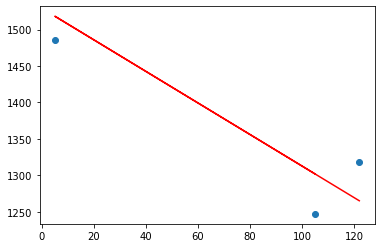

In [40]:
plt.scatter(X_test_south, y_test_south)
plt.plot(X_test_south, y_pred_south, c='r')

In [41]:
X_const_south = sm.add_constant(X_train_south)

In [42]:
model_south = sm.OLS(y_train_south, X_const_south)
results_south = model_south.fit()
print(results_south.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     10.43
Date:                Thu, 28 Oct 2021   Prob (F-statistic):            0.00402
Time:                        05:16:55   Log-Likelihood:                -141.87
No. Observations:                  23   AIC:                             287.7
Df Residuals:                      21   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1529.1437     52.542     29.103      0.0

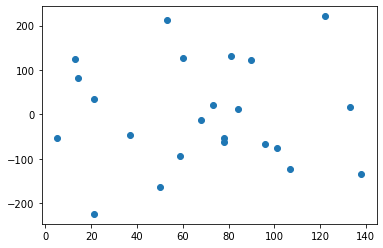

In [43]:
# посмотрим на остатки Южного региона

plt.scatter(X_const_south.iloc[:, 1], results_south.resid)

(array([1., 1., 3., 6., 1., 4., 1., 4., 0., 2.]),
 array([-223.68835686, -179.22647761, -134.76459835,  -90.3027191 ,
         -45.84083985,   -1.3789606 ,   43.08291866,   87.54479791,
         132.00667716,  176.46855641,  220.93043567]),
 <BarContainer object of 10 artists>)

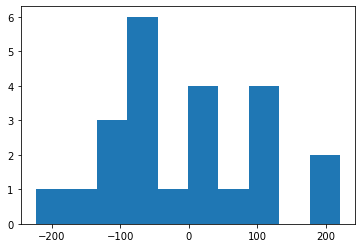

In [44]:
plt.hist(results_south.resid)

# Расчитаем Северный регион (north)

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

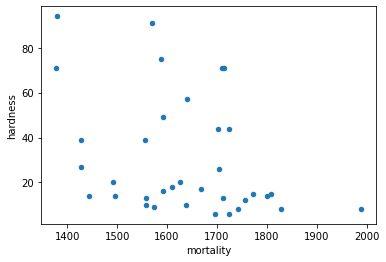

In [45]:
# Точечный для Севера

water_north.plot(kind='scatter', x='mortality', y='hardness')

In [46]:
# Кор. Пирсона для Севера (north)

water_north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [47]:
# Кор. Спирмена для Севера

water_north[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


# Регрессия Северного региона

In [48]:
X_north = water_south[['hardness']]
y_north = water_south['mortality']

In [49]:
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X_north, y_north, test_size=0.10, random_state=42)

In [50]:
model_north = LinearRegression()
model_north.fit(X_train_north, y_train_north)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [51]:
model_north.coef_

array([-2.1645425])

In [52]:
model_north.intercept_

1529.143749365289

In [53]:
y_pred_north = model_north.predict(X_test_north)
y_pred_north

array([1265.06956433, 1518.32103686, 1301.86678684])

In [54]:
model_north.score(X_test_north, y_test_north) # метод возвращает значение коэффициента детерминации

0.7724212353112103

In [55]:
# сравниваем прогнозы с фактом

res_water_north = X_test_north.copy()

res_water_north['y_pred_north'] = y_pred_north
res_water_north['y_test_north'] = y_test_north
res_water_north

,hardness,y_pred_north,y_test_north
18,122,1265.069564,1318
38,5,1518.321037,1486
0,105,1301.866787,1247


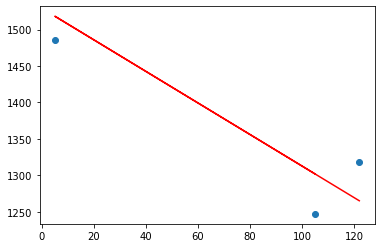

In [56]:
plt.scatter(X_test_north, y_test_north)
plt.plot(X_test_north, y_pred_north, c='r')

In [57]:
X_const_north = sm.add_constant(X_train_north) # техническая особенность библиотек, надо руками добавить константу

In [58]:
model_north = sm.OLS(y_train_north, X_const_north)
results_north = model_north.fit()
print(results_north.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     10.43
Date:                Thu, 28 Oct 2021   Prob (F-statistic):            0.00402
Time:                        05:16:56   Log-Likelihood:                -141.87
No. Observations:                  23   AIC:                             287.7
Df Residuals:                      21   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1529.1437     52.542     29.103      0.0

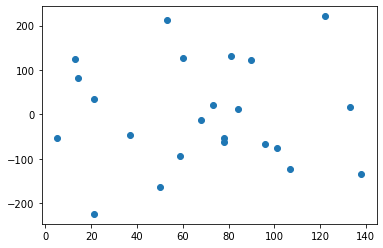

In [59]:
# посмотрим на остатки Северного регона
plt.scatter(X_const_north.iloc[:, 1], results_north.resid)

(array([1., 1., 3., 6., 1., 4., 1., 4., 0., 2.]),
 array([-223.68835686, -179.22647761, -134.76459835,  -90.3027191 ,
         -45.84083985,   -1.3789606 ,   43.08291866,   87.54479791,
         132.00667716,  176.46855641,  220.93043567]),
 <BarContainer object of 10 artists>)

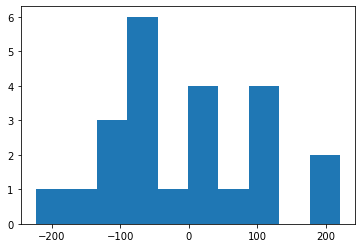

In [60]:
plt.hist(results_north.resid)

# Итог

Если рассматривать Регионы по отдельности можно невооруженным глазом заметить, что Коэффициент Детерминации выше, чем у общей картины (датафрейм water)
Если сравнивать корреляции, то Для Юга, она выше, чем у Севера, но ниже, чем у cовокупности этих данных(датафрейм water)
Данных мало и модели получаются госмоскедастичными.